Задача вычислить число Фиббоначи

Наивный метод с рекурсией

In [4]:
def fib1(n):
    assert n >= 0
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fib1(n-2)+fib1(n-1)

In [5]:
fib1(8)

21

Напишем декоратор для замера времени

In [64]:
import time
def timecheck(f, *args, iter = 100):
    minn = float('inf')
    for a in range(iter):
        t1 = time.perf_counter()
        r = f(*args)
        t2 = time.perf_counter()
        minn = min(minn,t2 - t1)
    return minn

In [56]:
timecheck(fib1, 20)

(6765, 0.004824679999728687, 8478.455580937, 8478.460543286)

Начнем сохранять ранее расчитанные значения

In [57]:
from functools import lru_cache
fib2 = lru_cache(maxsize = None)(fib1)

In [58]:
fib2(8)

21

In [60]:
timecheck(fib2, 34)

(5702887, 0.0, 8513.557976842, 8513.557977171)

Другой способ записи

In [22]:
@lru_cache(maxsize = None)
def fib1_1(n):
    assert n >= 0
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fib1(n-2)+fib1(n-1)

In [23]:
timecheck(fib1_1, 20)

0.0

Линейный способ

In [24]:
def fib3(n):
    f0 = 0
    f1 = 1
    for a in range(n-1):
        f0, f1 = f1, f0 + f1
    return f1

In [25]:
fib3(8)

21

In [26]:
timecheck(fib3, 1000)

8.365500025320216e-05

Построим графики времени расчета

In [27]:
from matplotlib import pyplot

In [31]:
def graph(fs, args):
    for f in fs:
        pyplot.plot(args, [timecheck(f, arg) for arg in args])
        pyplot.legend()
        pyplot.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


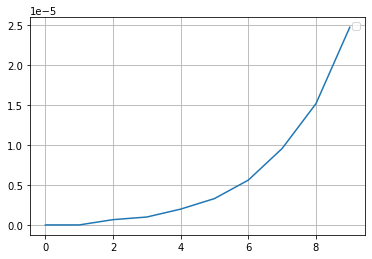

In [33]:
graph((fib1,),list(range(10)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


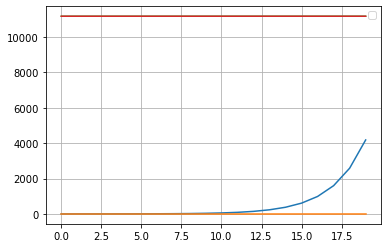

In [61]:
graph((fib2,),list(range(20)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


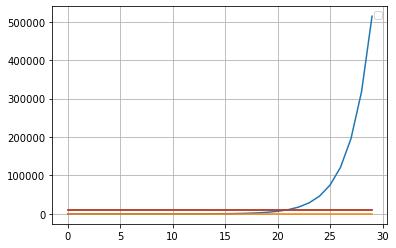

In [62]:
graph((fib1_1,),list(range(30)))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


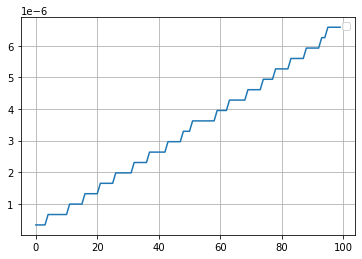

In [65]:
graph((fib3,),list(range(100)))